In [7]:
import torch
import numpy
from dataset import get_fnirs_dataloader


In [8]:
from torch.utils.data import DataLoader
from dataset import *
dataset = ONRData()

train_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
real_fnirs = []
labels = []
real_ones = []
real_zeros = []
for i, (data, label) in enumerate(train_loader):
    real_fnirs.append(data.to('cpu'))
    labels.append(label.to('cpu'))
    if label == 1:
        real_ones.append(data.to('cpu'))
    else:    
        real_zeros.append(data.to('cpu'))

real_fnirs = torch.cat(real_fnirs, dim=0).to('cpu')

# add channel dimension

print(real_fnirs.shape)


torch.Size([1534, 4, 12, 8])


In [9]:
synthetic_0 = torch.load('diffusion_results/final_samples/class_0_samples.pt').to('cpu')
synthetic_1 = torch.load('diffusion_results/final_samples/class_1_samples.pt').to('cpu')
all_synthetic = torch.cat([synthetic_0, synthetic_1], dim=0).to('cpu')
synth_labels = torch.cat([torch.zeros(synthetic_0.shape[0]), torch.ones(synthetic_1.shape[0])], dim=0).to('cpu')
all_synthetic.shape


C:\Users\Alex\AppData\Local\Temp\ipykernel_11632\4273042102.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  synthetic_0 = torch.load('diffusion_results/final_samples/cla

torch.Size([200, 4, 12, 8])

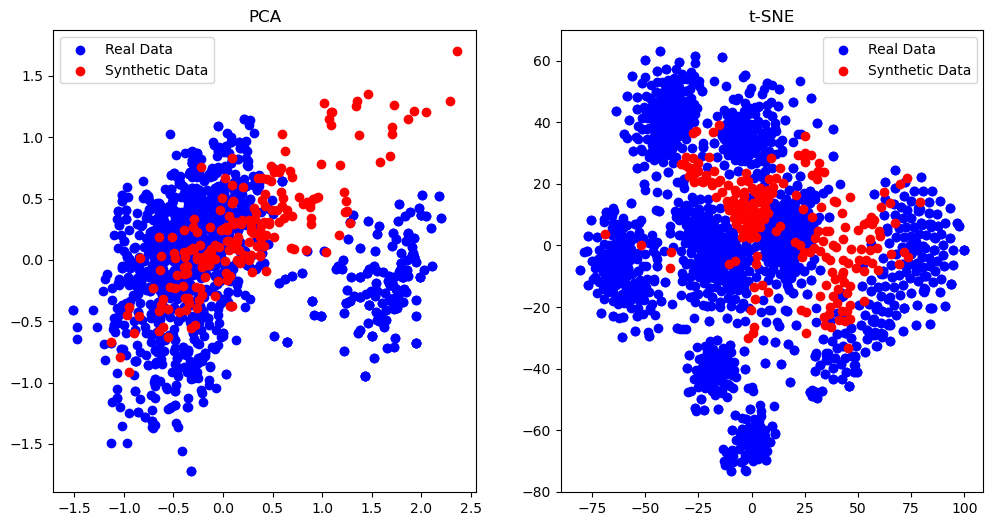

In [10]:
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Flatten the data for PCA and t-SNE
real_fnirs_flat = real_fnirs.view(real_fnirs.size(0), -1)
synthetic_flat = all_synthetic.view(all_synthetic.size(0), -1)

# PCA
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_fnirs_flat)
synthetic_pca = pca.transform(synthetic_flat)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
combined_flat = torch.cat([real_fnirs_flat, synthetic_flat], dim=0)
combined_tsne = tsne.fit_transform(combined_flat)
real_tsne = combined_tsne[:real_fnirs_flat.size(0)]
synthetic_tsne = combined_tsne[real_fnirs_flat.size(0):]

# Plot PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(real_pca[:, 0], real_pca[:, 1], c='blue', label='Real Data')
plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], c='red', label='Synthetic Data')
plt.title('PCA')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(real_tsne[:, 0], real_tsne[:, 1], c='blue', label='Real Data')
plt.scatter(synthetic_tsne[:, 0], synthetic_tsne[:, 1], c='red', label='Synthetic Data')
plt.title('t-SNE')
plt.legend()

plt.show()









